# Makeup Shades Analysis

### Dataset Information

#### Columns :

H : Hue

S : Saturation

V : Value

L : Lightness

Group :
        
        0 : Fenty Beauty's PRO FILT'R Foundation Only
        
        1 : Make Up For Ever's Ultra HD Foundation Only
        
        2 : US Best Sellers
        
        3 : BIPOC-recommended Brands with BIPOC Founders
        
        4 : BIPOC-recommended Brands with White Founders
        
        5 : Nigerian Best Sellers
        
        6 : Japanese Best Sellers
        
        7 : Indian Best Sellers

#### Note:

BIPOC stands for "Black, Indigenous, People of Color".

##### "Value" means brightness in this context.

In [1]:
# Loading the necessary libraries.

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import norm, skew
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the shades dataset and saving it into a dataframe called "shades_df".

shades_df = pd.read_csv('shades.csv')

In [3]:
shades_df.head()

,brand,brand_short,product,product_short,hex,H,S,V,L,group
0,Maybelline,mb,Fit Me,fmf,f3cfb3,26.0,0.26,0.95,86,2
1,Maybelline,mb,Fit Me,fmf,ffe3c2,32.0,0.24,1.00,92,2
2,Maybelline,mb,Fit Me,fmf,ffe0cd,23.0,0.20,1.00,91,2
3,Maybelline,mb,Fit Me,fmf,ffd3be,19.0,0.25,1.00,88,2
4,Maybelline,mb,Fit Me,fmf,bd9584,18.0,0.30,0.74,65,2


In [4]:
print("Dataset Dimensions: {} x {}".format(shades_df.shape[0], shades_df.shape[1]))

Dataset Dimensions: 625 x 10


### Data Preprocessing

In [5]:
# Provides information about the dataframe.

shades_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          625 non-null    object 
 1   brand_short    625 non-null    object 
 2   product        625 non-null    object 
 3   product_short  625 non-null    object 
 4   hex            625 non-null    object 
 5   H              613 non-null    float64
 6   S              613 non-null    float64
 7   V              613 non-null    float64
 8   L              625 non-null    int64  
 9   group          625 non-null    int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 49.0+ KB


In [6]:
# Descriptive statistics of the features in the dataset.

shades_df.describe()

,H,S,V,L,group
count,613.000000,613.000000,613.000000,625.000000,625.000000
mean,25.314845,0.459494,0.779543,65.920000,3.472000
std,5.327852,0.154089,0.173955,17.512267,1.976529
min,4.000000,0.100000,0.200000,11.000000,0.000000
25%,23.000000,0.350000,0.690000,55.000000,2.000000
50%,26.000000,0.440000,0.840000,71.000000,3.000000
75%,29.000000,0.560000,0.910000,79.000000,5.000000
max,45.000000,1.000000,1.000000,95.000000,7.000000


In [7]:
# Checking for missing values.

shades_df.isna().sum()

brand             0
brand_short       0
product           0
product_short     0
hex               0
H                12
S                12
V                12
L                 0
group             0
dtype: int64

##### The columns H, S, and V contain 12 null values each.

In [8]:
# Dropping the missing values.

shades_df.dropna(inplace = True)
shades_df

,brand,brand_short,product,product_short,hex,H,S,V,L,group
0,Maybelline,mb,Fit Me,fmf,f3cfb3,26.0,0.26,0.95,86,2
1,Maybelline,mb,Fit Me,fmf,ffe3c2,32.0,0.24,1.00,92,2
2,Maybelline,mb,Fit Me,fmf,ffe0cd,23.0,0.20,1.00,91,2
3,Maybelline,mb,Fit Me,fmf,ffd3be,19.0,0.25,1.00,88,2
4,Maybelline,mb,Fit Me,fmf,bd9584,18.0,0.30,0.74,65,2
...,...,...,...,...,...,...,...,...,...,...
620,L'Oréal,lo,True Match,tms,eecfba,24.0,0.22,0.93,85,7
621,L'Oréal,lo,True Match,tms,e8c7b8,19.0,0.21,0.91,83,7
622,L'Oréal,lo,True Match,tms,f0cbb9,20.0,0.23,0.94,85,7
623,L'Oréal,lo,True Match,tms,e9c4b1,20.0,0.24,0.91,82,7


In [9]:
# Renaming the column names.

shades_df = shades_df.rename(columns = {'H' : 'hue', 'S' : 'saturation', 'V' : 'value', 'L' : 'lightness', 'group' : 'group_number'})
shades_df.head()

,brand,brand_short,product,product_short,hex,hue,saturation,value,lightness,group_number
0,Maybelline,mb,Fit Me,fmf,f3cfb3,26.0,0.26,0.95,86,2
1,Maybelline,mb,Fit Me,fmf,ffe3c2,32.0,0.24,1.00,92,2
2,Maybelline,mb,Fit Me,fmf,ffe0cd,23.0,0.20,1.00,91,2
3,Maybelline,mb,Fit Me,fmf,ffd3be,19.0,0.25,1.00,88,2
4,Maybelline,mb,Fit Me,fmf,bd9584,18.0,0.30,0.74,65,2


In [10]:
## Feature Engineering

# Inserting the names of the corresponding group numbers.

group = {
    
    0: 'Fenty Beauty\'s PRO FILT\'R Foundation Only',
    1: 'Make Up For Ever\'s Ultra HD Foundation Only',
    2: 'US Best Sellers',
    3: 'BIPOC-recommended Brands with BIPOC Founders',
    4: 'BIPOC-recommended Brands with White Founders',
    5: 'Nigerian Best Sellers',
    6: 'Japanese Best Sellers',
    7: 'Indian Best Sellers'

}

shades_df['group_name'] = shades_df.group_number.map(group)

shades_df.head()

,brand,brand_short,product,product_short,hex,hue,saturation,value,lightness,group_number,group_name
0,Maybelline,mb,Fit Me,fmf,f3cfb3,26.0,0.26,0.95,86,2,US Best Sellers
1,Maybelline,mb,Fit Me,fmf,ffe3c2,32.0,0.24,1.00,92,2,US Best Sellers
2,Maybelline,mb,Fit Me,fmf,ffe0cd,23.0,0.20,1.00,91,2,US Best Sellers
3,Maybelline,mb,Fit Me,fmf,ffd3be,19.0,0.25,1.00,88,2,US Best Sellers
4,Maybelline,mb,Fit Me,fmf,bd9584,18.0,0.30,0.74,65,2,US Best Sellers


### Exploratory Data Analysis (EDA)

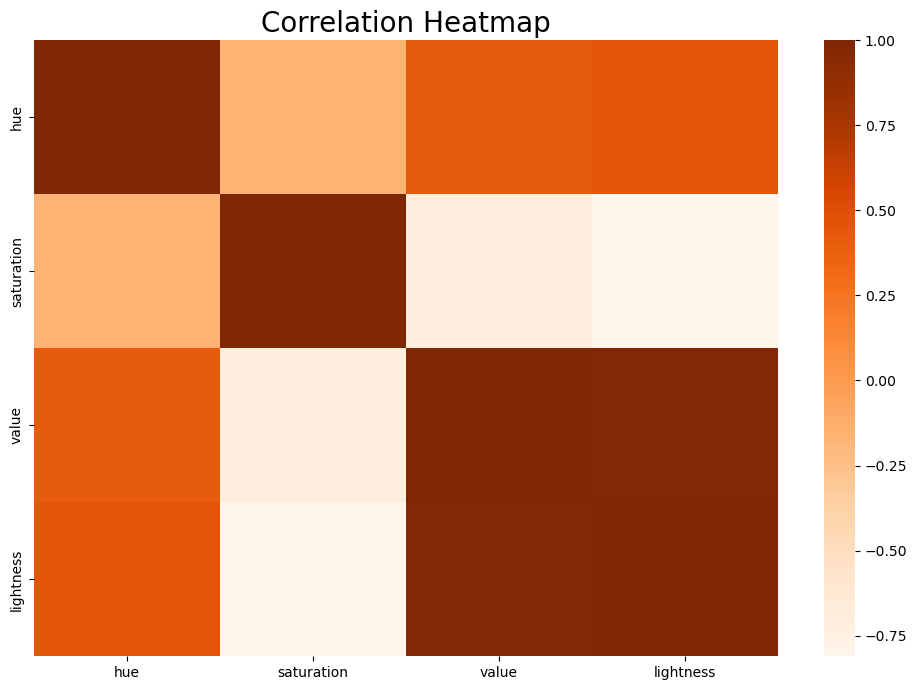

In [11]:
# Correlation matrix for the continuous(numerical) variables hue, saturation, value, and lightness.

continuous_var = ['hue', 'saturation', 'value', 'lightness']
selected_var = shades_df[continuous_var]

plt.figure(figsize = (12,8))
sns.heatmap(selected_var.corr(), cmap = 'Oranges')
plt.title("Correlation Heatmap", fontsize = 20)
plt.show()

##### From the above correlation matrix, it is evident that the features Value and Lightness are highly correlated.

### Hue:

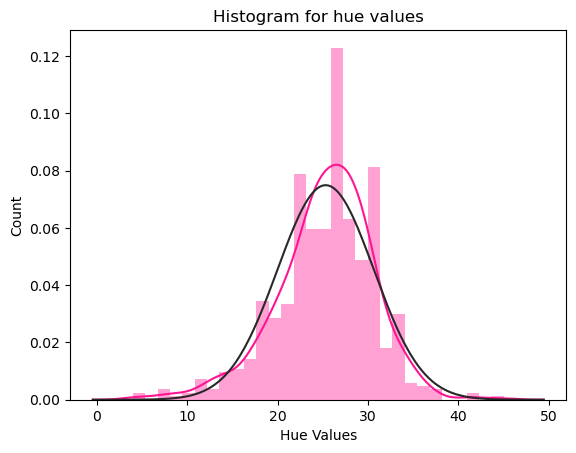

In [12]:
# Checking data distribution for hue values.

sns.distplot(shades_df['hue'], fit = norm, color = 'deeppink')
plt.xlabel("Hue Values")
plt.ylabel("Count")
plt.title("Histogram for hue values")
plt.show()

In [13]:
# Checking for skewness.

print(shades_df.hue.skew())

-0.5304966530816727


##### The distribution for hue is left(negative) skewed.

In [14]:
# Displays the top 5 'hue' values with their respective brand, product, group names and number.  

hue_df = shades_df.nlargest(5, columns = 'hue')[['brand', 'product', 'hue', 'group_name', 'group_number']]
hue_data = hue_df.style.background_gradient(subset = ['hue'], cmap = 'RdPu')
hue_data

,brand,product,hue,group_name,group_number
241,Beauty Bakerie,#1 CAKE MIX,45.000000,BIPOC-recommended Brands with BIPOC Founders,3
579,Bharat & Doris,Liquid Foundation,42.000000,Indian Best Sellers,7
242,Beauty Bakerie,#1 CAKE MIX,41.000000,BIPOC-recommended Brands with BIPOC Founders,3
408,Make Up For Ever,Ultra HD,37.000000,Make Up For Ever's Ultra HD Foundation Only,1
529,Shu Uemera,Petal Skin Fluid,37.000000,Japanese Best Sellers,6


##### The brands which fall under the groups such as "BIPOC-recommended Brands with BIPOC Founders", "Indian Best Sellers", "Make Up For Ever's Ultra HD Foundation Only", and "Japanese Best Sellers" fall under the top 5 'hue' values.

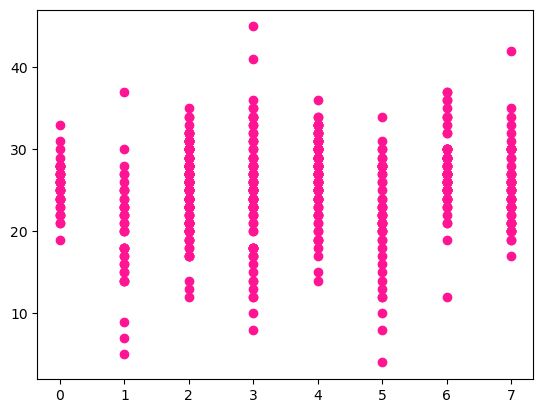

In [15]:
# Scatter plot of 'hue' vs 'group_number'.

plt.scatter(shades_df['group_number'], shades_df['hue'], color = 'deeppink')
plt.show()

### Saturation:

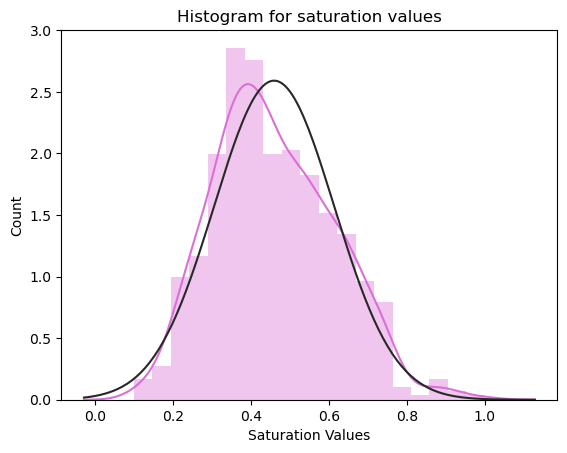

In [16]:
# Checking data distribution for saturation values.

sns.distplot(shades_df['saturation'], fit = norm, color = 'orchid')
plt.xlabel("Saturation Values")
plt.ylabel("Count")
plt.title("Histogram for saturation values")
plt.show()

In [17]:
# Checking for skewness.

print(shades_df.saturation.skew())

0.38527434348467554


##### The distribution for "saturation" is right(positive) skewed.

In [18]:
# Displays the top 5 'saturation' values with their respective brand, product and group names.  

saturation_df = shades_df.nlargest(5, columns = 'saturation')[['brand', 'product', 'saturation', 'group_name']]
saturation_data = saturation_df.style.background_gradient(subset = ['saturation'], cmap = 'PuRd')
saturation_data

,brand,product,saturation,group_name
402,Bobbi Brown,Skin Long-Wear,1.000000,BIPOC-recommended Brands with White Founders
211,Iman,Second to None,0.940000,BIPOC-recommended Brands with BIPOC Founders
154,L'Oréal,Infalliable,0.920000,US Best Sellers
214,Iman,Second to None,0.900000,BIPOC-recommended Brands with BIPOC Founders
213,Iman,Second to None,0.890000,BIPOC-recommended Brands with BIPOC Founders


##### The brands which fall under the groups such as "BIPOC-recommended Brands with White Founders", "BIPOC-recommended Brands with BIPOC Founders", and "US Best Sellers" fall under the top 5 'saturation' values.

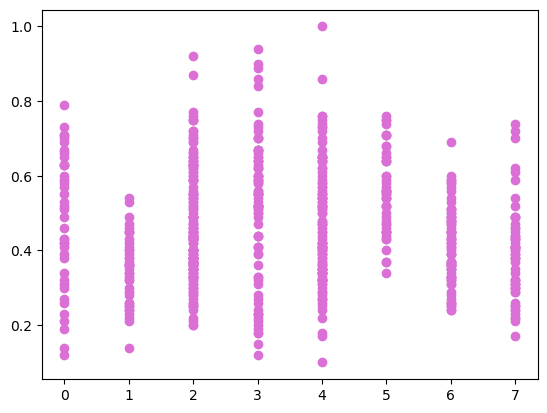

In [19]:
# Scatter plot of 'saturation' vs 'group_number'.

plt.scatter(shades_df['group_number'], shades_df['saturation'], color = 'orchid')
plt.show()

### Value/brightness:

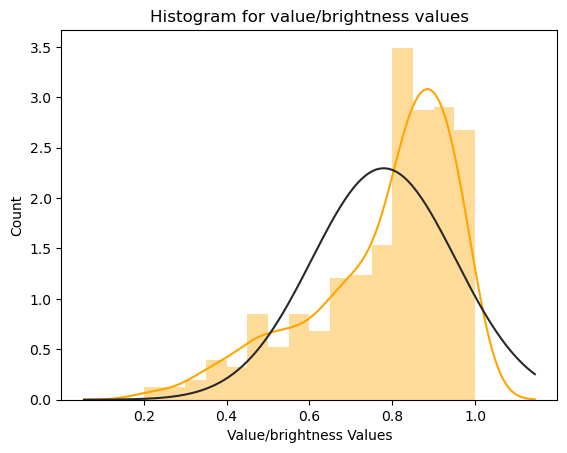

In [20]:
# Checking data distribution for value/brightness values.

sns.distplot(shades_df['value'], fit = norm, color = 'orange')
plt.xlabel("Value/brightness Values")
plt.ylabel("Count")
plt.title("Histogram for value/brightness values")
plt.show()

In [21]:
# Checking for skewness.

print(shades_df.value.skew())

-1.0666384798709472


##### The distribution for value/brightness is left(negative) skewed .

In [22]:
# Displays the top 5 'value/brightness' values with their respective brand, product and group names.  

value_df = shades_df.nlargest(5, columns = 'value')[['brand', 'product', 'value', 'group_name']]
value_data = value_df.style.background_gradient(subset = ['value'], cmap = 'Reds')
value_data

,brand,product,value,group_name
1,Maybelline,Fit Me,1.000000,US Best Sellers
2,Maybelline,Fit Me,1.000000,US Best Sellers
3,Maybelline,Fit Me,1.000000,US Best Sellers
69,Estée Lauder,Double Wear,1.000000,US Best Sellers
73,Estée Lauder,Double Wear,1.000000,US Best Sellers


##### "US Best Sellers" account for the top 5 'value/brightness' values.

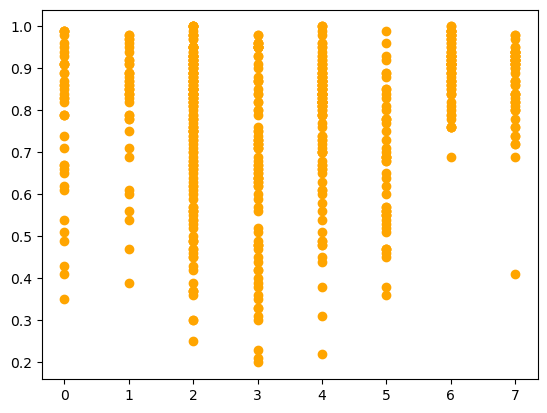

In [23]:
# Scatter plot of 'value/brightness' vs 'group_number'.

plt.scatter(shades_df['group_number'], shades_df['value'], color = 'orange')
plt.show()

### Lightness:

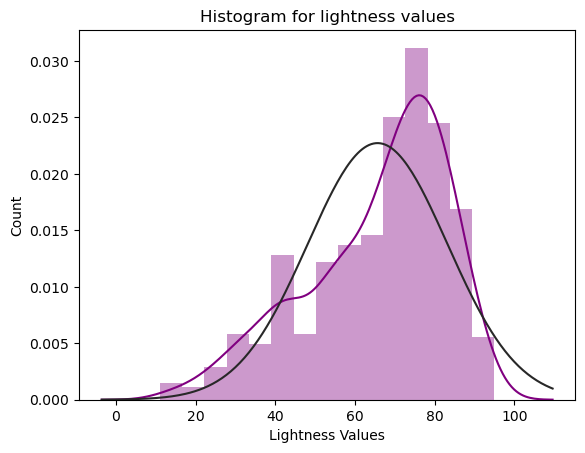

In [24]:
# Checking data distribution for lightness values.

sns.distplot(shades_df['lightness'], fit = norm, color = 'purple')
plt.xlabel("Lightness Values")
plt.ylabel("Count")
plt.title("Histogram for lightness values")
plt.show()

In [25]:
# Checking for skewness and kurtosis.

print(shades_df.lightness.skew())

-0.776318262945134


##### The distribution for lightness is left(negative) skewed.

In [26]:
# Displays the top 5 'lightness' values with their respective brand, product and group names.  

lightness_df = shades_df.nlargest(5, columns = 'lightness')[['brand', 'product', 'lightness', 'group_name']]
lightness_data = lightness_df.style.background_gradient(subset = ['lightness'], cmap = 'Purples')
lightness_data

,brand,product,lightness,group_name
292,Lancôme,Teint Idole,95,BIPOC-recommended Brands with White Founders
167,Fenty,PRO FILT'R,94,Fenty Beauty's PRO FILT'R Foundation Only
241,Beauty Bakerie,#1 CAKE MIX,94,BIPOC-recommended Brands with BIPOC Founders
242,Beauty Bakerie,#1 CAKE MIX,94,BIPOC-recommended Brands with BIPOC Founders
168,Fenty,PRO FILT'R,93,Fenty Beauty's PRO FILT'R Foundation Only


##### The groups, "BIPOC-recommended Brands with White Founders", "Fenty Beauty's PRO FILT'R Foundation Only", and "BIPOC-recommended Brands with BIPOC Founders" account for the top 5 'lightness' values.

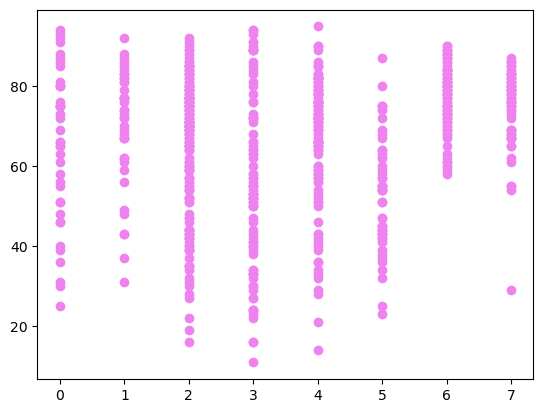

In [27]:
# Scatter plot of 'lightness' vs 'group_number'.

plt.scatter(shades_df['group_number'], shades_df['lightness'], color = 'violet')
plt.show()

### Top 10 Makeup Brands

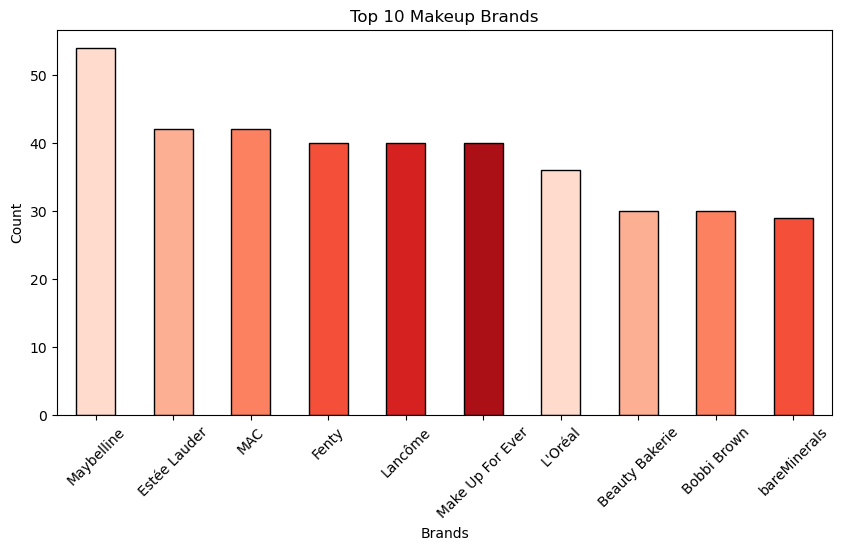

In [28]:
# Plot displaying the top most 10 popular makeup brands.

top_10_brands = shades_df['brand'].value_counts().head(10)

col = sns.color_palette('Reds')

plt.figure(figsize = (10, 5))
top_10_brands.plot(kind = 'bar', edgecolor = 'black', color = col)
plt.title('Top 10 Makeup Brands')
plt.xlabel('Brands', size = 10)
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

##### It can be inferred from the above bar chart, that Maybelline is the No.1 makeup brand overall, in terms of popularity.

### Most popular groups

In [29]:
# Removing the groups "Make Up For Ever's Ultra HD Foundation Only" and "Fenty Beauty's PRO FILT'R Foundation Only" as 
# these two groups consist of only one product.

new_data = shades_df[~shades_df['group_name'].isin(['Fenty Beauty\'s PRO FILT\'R Foundation Only', 
                                                'Make Up For Ever\'s Ultra HD Foundation Only'])]

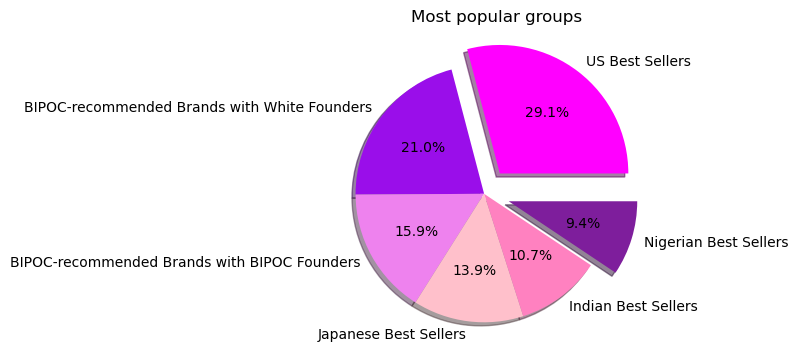

In [30]:
# Pie chart displaying the most popular groups.

popular_groups = new_data['group_name'].value_counts()

colors = ['#FF00FF', '#9A0EEA', '#EE82EE' ,'#FFC0CB', '#FF81C0', '#7E1E9C']

plt.figure(figsize = (4,4))
plt.pie(popular_groups, labels = popular_groups.index, autopct = '%1.1f%%', shadow = True, explode = (0.2,0,0,0,0,0.2),
        colors = colors)
plt.title('Most popular groups')
plt.axis('equal')
plt.show()

##### The above pie chart shows that "US Best Sellers" is the most popular group, and "Nigerian Best Sellers" is the least popular group.

### Most popular brands in each group.

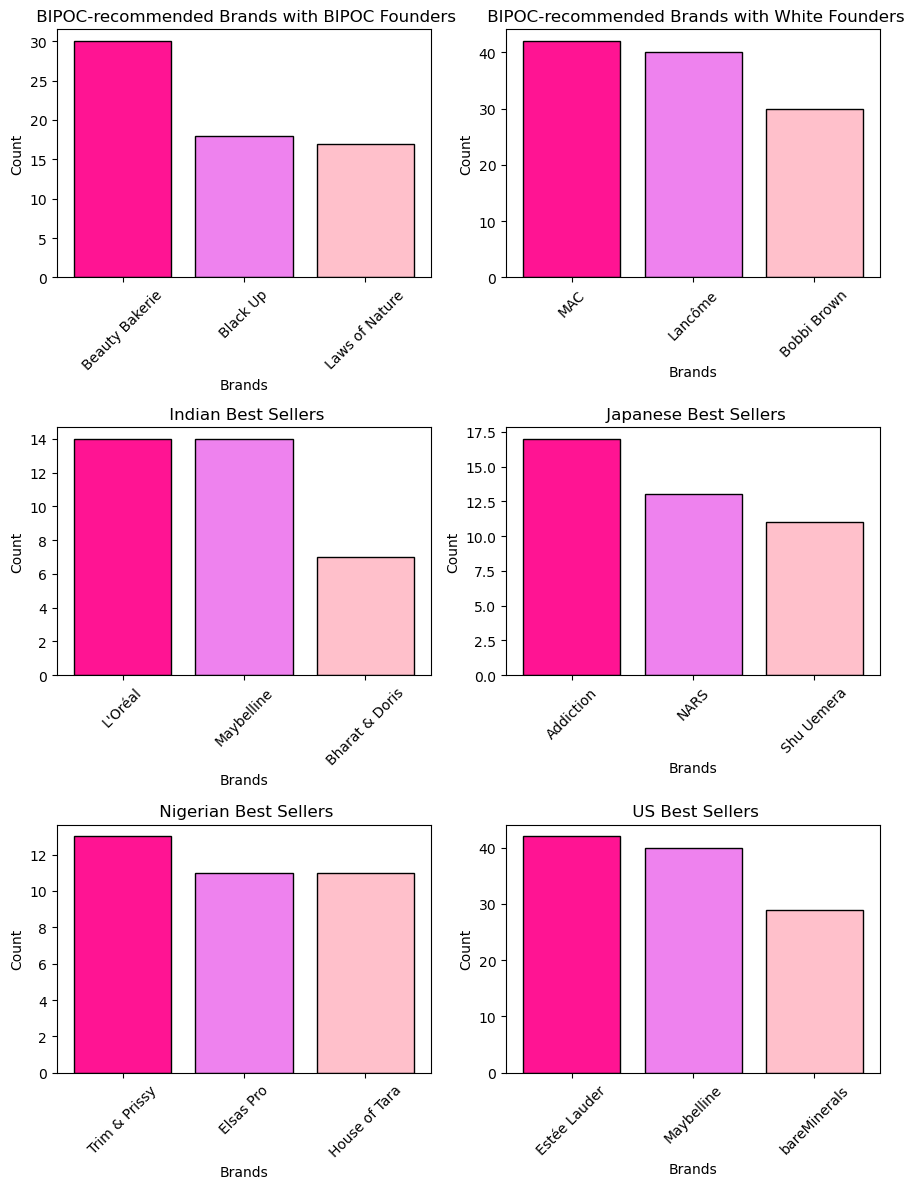

In [31]:
# Plot displaying the top brands in each group.

top_3 = new_data.groupby(["group_name", "brand"]).size().unstack()

colors = ['deeppink', 'violet', 'pink']
fig, axes = plt.subplots(3, 2, figsize = (9, 12))

for i, ax in enumerate(axes.flatten()):
    group_name = top_3.index[i]
    top_3_brands = top_3.loc[group_name].nlargest(3)
    ax.bar(top_3_brands.index, top_3_brands.values,  edgecolor = 'black', color = colors)
    ax.set_xlabel("Brands")
    ax.set_ylabel("Count")
    ax.set_title(f" {group_name}")
    ax.tick_params(axis = 'x', rotation = 45)
    plt.tight_layout()
plt.show()

### Most popular brands by groups according to the above analysis are:

##### BIPOC-recommended Brands with BIPOC Founders:
        
        1. Beauty Bakerie
        2. Black Up
        3. Laws of Nature

##### BIPOC-recommended Brands with White Founders:

        1. MAC
        2. Lancôme
        3. Bobbi Brown
        
##### Indian Best Sellers:

        1. L'Oréal and Maybelline (Tie)
        2. Bharat & Doris 
        
##### Japanese Best Sellers:

        1. Addiction
        2. NARS
        3. Shu Uemera
        
##### Nigerian Best Sellers:

        1. Trim & Prissy
        2. Elsas Pro
        3. House of Tara
        
##### US Best Sellers:

        1. Estée Lauder
        2. Maybelline
        3. bareMinerals